<a href="https://colab.research.google.com/github/ziedjouini/machine-learning/blob/main/Linear_regression_2_Multivariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Execute the code below

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv"
df_weather = pd.read_csv(link)

# Multivariate linear regression with Scikit-Learn

The equation of an univariate linear regresion is a line : aX +b

The equation of a multivariate linear regression with 2 variables is a plan : aW + bX + c

The equation of a multivariate linear regression with n variables is a hyperplan : a1 X1 + a2 X2 + .... + an Xn + b


## Let's start with 2 variables
With Plotly express, show a [3D scatterplot ](https://plotly.com/python/plotly-express/#3d-coordinates)with :
- X-axis : MAX temperature
- Y-axis : MIN temperature
- Z-axis : Sunhours


In [ ]:
df_weather.head()

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,...,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,MONTH,DAY
0,2019-01-01,9,4,10,4,7,8,0.2,94,9.0,...,3,116,143,176,0,1,5.1,very bad,1,1
1,2019-01-02,8,5,18,7,7,5,0.0,90,9.0,...,3,119,116,116,0,1,8.7,very bad,1,2
2,2019-01-03,6,0,18,0,4,3,0.0,88,10.0,...,-4,116,116,116,0,1,8.7,very bad,1,3
3,2019-01-04,5,-1,15,-1,4,3,0.0,91,10.0,...,-4,116,116,122,0,1,5.1,very bad,1,4
4,2019-01-05,6,-1,8,-1,4,3,0.0,91,8.0,...,-2,143,116,116,0,1,8.7,very bad,1,5


In [ ]:
# Complete x, y and z in the script below:
px.scatter_3d(x = 'MAX_TEMPERATURE_C', 
              y = 'MIN_TEMPERATURE_C', 
              z= 'SUNHOUR', 
              data_frame=df_weather)


Is it hard to read the 3D scatterplot ? You can move it with your mouse.

### Let's predict
You have to predict the MAX temperature from 2 variables :
- MIN temperature
- Sunhours

Hey, it's the reason why X has 2 brackets and is uppercase and y has a simple bracket and is lowercase . It can take multiple variables (X) to predict only one target (y). 

**Remember to save the result of your prediction in a new column 'predict'.**

In [ ]:
# Your code here :
from sklearn.linear_model import LinearRegression
X = df_weather[['MIN_TEMPERATURE_C', 'SUNHOUR']]
y = df_weather['MAX_TEMPERATURE_C']

# We train a "model" with "fit" function. This model will store coefficients after training.
model = LinearRegression().fit(X, y)
df_weather['predict'] = model.predict(X)
df_weather

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,...,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,MONTH,DAY,predict
0,2019-01-01,9,4,10,4,7,8,0.2,94,9.000,...,116,143,176,0,1,5.1,very bad,1,1,8.980922
1,2019-01-02,8,5,18,7,7,5,0.0,90,9.000,...,119,116,116,0,1,8.7,very bad,1,2,12.353602
2,2019-01-03,6,0,18,0,4,3,0.0,88,10.000,...,116,116,116,0,1,8.7,very bad,1,3,7.410233
3,2019-01-04,5,-1,15,-1,4,3,0.0,91,10.000,...,116,116,122,0,1,5.1,very bad,1,4,4.037552
4,2019-01-05,6,-1,8,-1,4,3,0.0,91,8.000,...,143,116,116,0,1,8.7,very bad,1,5,6.421559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2019-12-27,13,10,13,10,12,11,0.0,96,7.375,...,119,143,116,0,1,8.7,not good not bad,12,27,17.296971
361,2019-12-28,11,5,12,7,8,8,0.0,93,7.625,...,143,116,116,0,1,6.9,very bad,12,28,11.161599
362,2019-12-29,9,2,11,3,6,7,0.0,86,10.000,...,116,116,116,0,1,8.7,very bad,12,29,9.387580
363,2019-12-30,12,4,7,5,9,9,0.0,61,10.000,...,113,113,113,0,1,8.7,very bad,12,30,11.364928


### Let's visualize
With Plotly express, show a 3D scatterplot with :

- X-axis : your new 'predict' column
- Y-axis : MIN temperature
- Z-axis : Sunhours



In [ ]:
# Your code here :
# Complete x, y and z in the script below:
px.scatter_3d(x = 'predict', 
              y = 'MIN_TEMPERATURE_C', 
              z= 'SUNHOUR', 
              data_frame=df_weather)


**Move the cube with your mouse. Hey your 3D-scatterplot has a special shape : it's a plan !**

## Multivariate linear regressions with N-variables
Make a prediction with the maximum number of variables. But beware : 
- variables must be numeric
- your target (MAX temperature) should not be present in variables

Store your prediction in a new column 'predict2'.

In our 3D human vision, we can't represent a hyperplan. But, let's trust in our computer, it can calculate. So trust it and show a simple scatterplot with :
- X-axis : Date
- Y-axis : MAX temperatures in blue dots and 'predict2' in orange dots

Expected result:

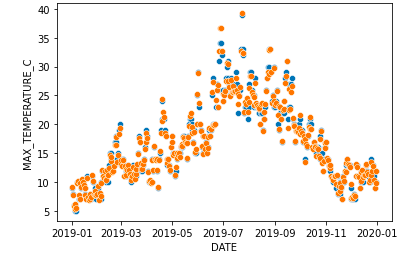

In [ ]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    365 non-null    object 
 1   MAX_TEMPERATURE_C       365 non-null    int64  
 2   MIN_TEMPERATURE_C       365 non-null    int64  
 3   WINDSPEED_MAX_KMH       365 non-null    int64  
 4   TEMPERATURE_MORNING_C   365 non-null    int64  
 5   TEMPERATURE_NOON_C      365 non-null    int64  
 6   TEMPERATURE_EVENING_C   365 non-null    int64  
 7   PRECIP_TOTAL_DAY_MM     365 non-null    float64
 8   HUMIDITY_MAX_PERCENT    365 non-null    int64  
 9   VISIBILITY_AVG_KM       365 non-null    float64
 10  PRESSURE_MAX_MB         365 non-null    int64  
 11  CLOUDCOVER_AVG_PERCENT  365 non-null    float64
 12  HEATINDEX_MAX_C         365 non-null    int64  
 13  DEWPOINT_MAX_C          365 non-null    int64  
 14  WINDTEMP_MAX_C          365 non-null    in

In [ ]:
# Your code here :
from sklearn.linear_model import LinearRegression
X = df_weather.drop(columns = ['DATE', 'OPINION', 'MAX_TEMPERATURE_C','predict'])
y = df_weather['MAX_TEMPERATURE_C']

# We train a "model" with "fit" function. This model will store coefficients after training.
model = LinearRegression().fit(X, y)
df_weather['predict2'] = model.predict(X)


In [ ]:
df_weather['DATE'] = pd.to_datetime(df_weather['DATE'])

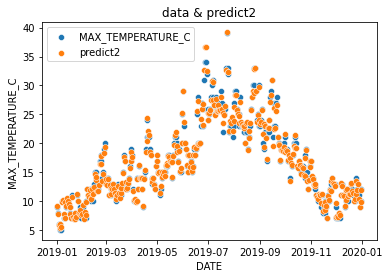

In [ ]:
# Your code here :
sns.scatterplot(data=df_weather, x='DATE', y='MAX_TEMPERATURE_C',  label ='MAX_TEMPERATURE_C')
sns.scatterplot(data=df_weather, x='DATE', y='predict2', label ='predict2')
plt.title('data & predict2');

You can read coefficient for each column with the attribute `.coef_`. Which column has the biggest coefficient ?

In [ ]:
# Your code here :
for i, j in zip (X.columns, model.coef_):
  print(f"{i:<30} {round(j,5)}")

MIN_TEMPERATURE_C              0.06144
WINDSPEED_MAX_KMH              -0.00282
TEMPERATURE_MORNING_C          -0.0878
TEMPERATURE_NOON_C             0.19104
TEMPERATURE_EVENING_C          0.17694
PRECIP_TOTAL_DAY_MM            0.00505
HUMIDITY_MAX_PERCENT           -0.00253
VISIBILITY_AVG_KM              0.01004
PRESSURE_MAX_MB                -0.00058
CLOUDCOVER_AVG_PERCENT         -0.00579
HEATINDEX_MAX_C                0.58428
DEWPOINT_MAX_C                 -0.03418
WINDTEMP_MAX_C                 0.05222
WEATHER_CODE_MORNING           0.00053
WEATHER_CODE_NOON              9e-05
WEATHER_CODE_EVENING           -0.00021
TOTAL_SNOW_MM                  0.0
UV_INDEX                       -0.0283
SUNHOUR                        -0.01729
MONTH                          0.01072
DAY                            -0.00133


In [ ]:
# maximum coef & column
print(X.columns[ model.coef_.argmax()], ', coef = ', max(model.coef_))

HEATINDEX_MAX_C , coef =  0.5842807479084101
